In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
%matplotlib inline

In [14]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

df.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [22]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,columns=['principal component 1','principal component 2','principal component 3'])

principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [23]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


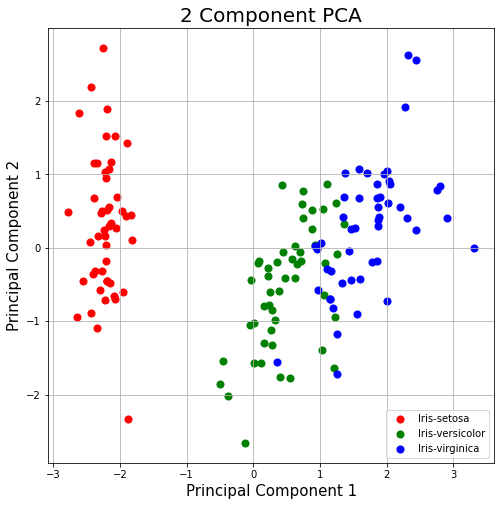

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [28]:
mnist = fetch_openml('mnist_784')


In [37]:

mnist.data.index

AttributeError: 'DataFrame' object has no attribute 'index_values'

In [40]:
scaler = StandardScaler()

# Fit on training set only.
standardized = scaler.fit_transform(mnist.data)


In [13]:
mnist.data.shape

(70000, 784)

In [44]:
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(mnist.data)
approximation = pca.inverse_transform(lower_dimensional_data)

Text(0.5, 1.0, '95% of Explained Variance')

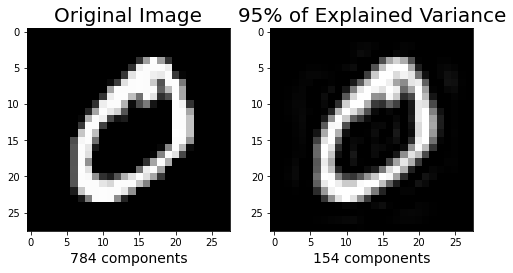

In [45]:
plt.figure(figsize=(8,4))

# Original Image
plt.subplot(1, 2, 1)s
plt.imshow(mnist.data.iloc[1].to_numpy().reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 154 principal components
plt.subplot(1, 2, 2)
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)